<a href="https://colab.research.google.com/github/Jayanthi-T/ML_LAB_Col/blob/main/EXP_9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **MACHINE LEARNING LABORATORY**

---------
# **1817119_JAYANTHI T**
#**✫ EXP 9 : Support Vector Machines**

   Weight  Size   Class
0      69  4.39  orange
1      69  4.21  orange
2      65  4.09  orange
3      72  5.85   apple
4      67  4.70  orange

Accuracy Of SVM For The Given Dataset :  0.375
Accuracy Metrics
              precision    recall  f1-score   support

       apple       0.38      1.00      0.55         3
      orange       0.00      0.00      0.00         5

    accuracy                           0.38         8
   macro avg       0.19      0.50      0.27         8
weighted avg       0.14      0.38      0.20         8

Confusion Matrix
[[3 0]
 [5 0]]


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


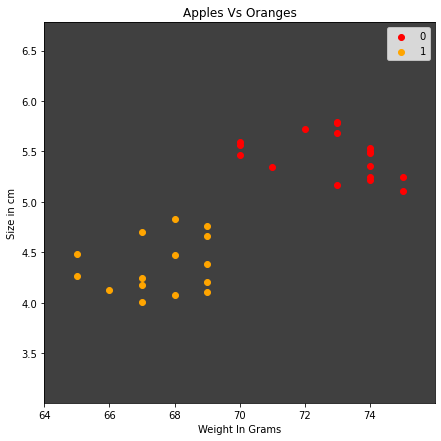

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.preprocessing import LabelEncoder
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

pd.options.mode.chained_assignment = None

data = pd.read_csv("apples_and_oranges.csv")

print(data.head())
training_set, test_set = train_test_split(data, test_size = 0.2, random_state = 1)

X_train = training_set.iloc[:,0:2].values
Y_train = training_set.iloc[:,2].values
X_test = test_set.iloc[:,0:2].values
Y_test = test_set.iloc[:,2].values

classifier = SVC(kernel='rbf', random_state = 5)
classifier.fit(X_train,Y_train)

Y_pred = classifier.predict(X_test)
test_set["Predictions"] = Y_pred

cm = confusion_matrix(Y_test,Y_pred)
accuracy = float(cm.diagonal().sum())/len(Y_test)
print("\nAccuracy Of SVM For The Given Dataset : ", accuracy)

le = LabelEncoder()
Y_train = le.fit_transform(Y_train)

classifier = SVC(kernel='rbf', random_state = 1)
classifier.fit(X_train,Y_train)
print('Accuracy Metrics')
print(classification_report(Y_test,Y_pred))

print('Confusion Matrix')
print(confusion_matrix(Y_test,Y_pred))

plt.figure(figsize = (7,7))
X_set, y_set = X_train, Y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01), np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape), alpha = 0.75, cmap = ListedColormap(('black', 'white')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'orange'))(i), label = j)
plt.title('Apples Vs Oranges')
plt.xlabel('Weight In Grams')
plt.ylabel('Size in cm')
plt.legend()
plt.show()